In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from drive.MyDrive.DL.codes.transcription.utils import plot_training
import tensorflow as tf
from drive.MyDrive.DL.codes.hatespeech.pipelines import ML,binarize, vectorize
import warnings
warnings.filterwarnings('ignore')
obj = 'img'
early_stopping = EarlyStopping(monitor='loss', patience=5)

Found 71496 files belonging to 6 classes.
Found 5000 files belonging to 6 classes.
Found 10000 files belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 1272s 563ms/step - accuracy: 0.6197 - loss: 2.1467 - val_accuracy: 0.5510 - val_loss: 0.7041
Epoch 2/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 130s 58ms/step - accuracy: 0.6289 - loss: 0.6609 - val_accuracy: 0.5510 - val_loss: 0.7042
Epoch 3/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 129s 58ms/step - accuracy: 0.6281 - loss: 1.4384 - val_accuracy: 0.5510 - val_loss: 0.7019
Epoch 4/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 129s 58ms/step - accuracy: 0.6292 - loss: 0.6594 - val_accuracy: 0.5510 - val_loss: 0.7023
Epoch 5/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 129s 58ms/step - accuracy: 0.6291 - loss: 0.6595 - val_accuracy: 0.5510 - val_loss: 0.7023
Epoch 6/150
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 129s 58ms/step - accuracy: 0.6291 - loss: 0.6595 - val_accuracy: 0.5510 - val_loss: 0.7022
Epoch 7/150
2235/2

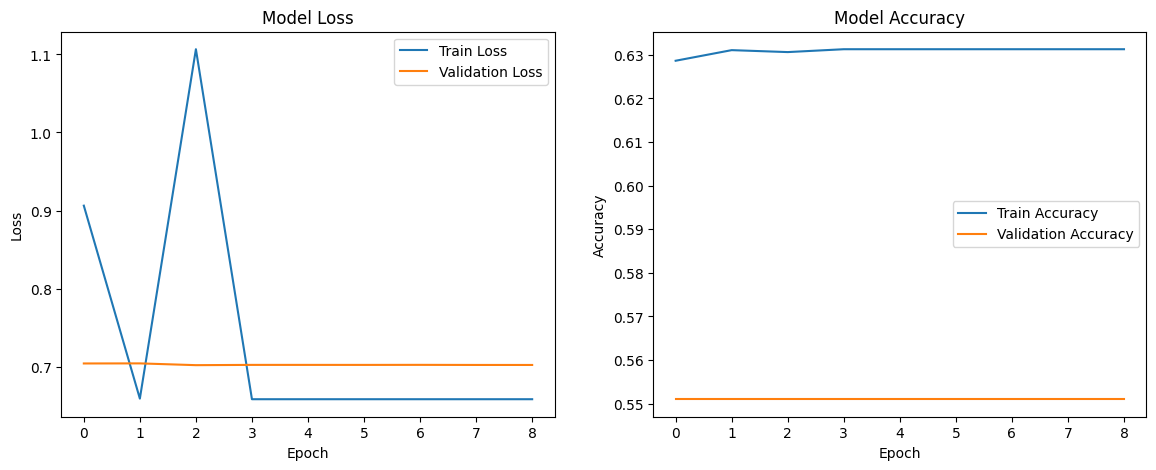

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/train',labels='inferred',label_mode='int',color_mode='rgb',batch_size=32,image_size=(224,224))
valid = tf.keras.utils.image_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/val',labels='inferred',label_mode='int',color_mode='rgb',batch_size=32,image_size=(224,224))
test  = tf.keras.utils.image_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/test',labels='inferred',label_mode='int',color_mode='rgb',batch_size=32,image_size=(224,224))

train = train.map(binarize)
valid = valid.map(binarize)
test = test.map(binarize)

vgg_model = VGG16(include_top=False,input_shape=(224,224,3))
x = Flatten()(vgg_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=vgg_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train,
    validation_data=valid,
    epochs=150,
    callbacks=[early_stopping]
)

model.evaluate(test)
plot_training(history)

In [ ]:
train = tf.keras.utils.text_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/train',labels='inferred',label_mode='int',batch_size=32)
valid = tf.keras.utils.text_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/val',labels='inferred',label_mode='int',batch_size=32)
test  = tf.keras.utils.text_dataset_from_directory(f'/content/drive/MyDrive/DL/PREG1/hate-speech/{obj}/test',labels='inferred',label_mode='int',batch_size=32)

train = train.map(binarize)
valid = valid.map(binarize)
test = test.map(binarize)

train = train.map(vectorize)
valid = valid.map(vectorize)
test = test.map(vectorize)

vgg_model = VGG16(include_top=False,input_shape=(224,224,1))

x = Resizing(224, 224,1)(vgg_model.input)
x = vgg_model(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
    train,
    validation_data=valid,
    epochs=150,
    callbacks=[early_stopping]
)

model.evaluate(test)
plot_training(history)